VIẾT CÁC HÀM DEF XU LÝ ẢNH:

1. DỌC VÀ HIỂN THỊ ẢNH

2. THÊM NHIỄU

2.1 LỌC NHIỄU

3. HISTOGRAM

4. PHÁT HIỆN BIÊN , CẠNH

5. LÀM SẮC NÉT(SHARPNING)



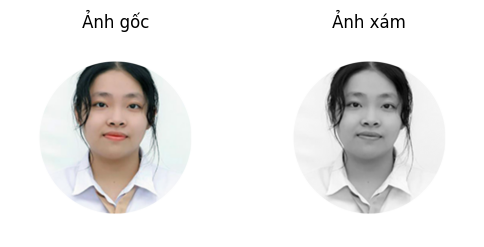

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#doc anh
#img_resized = cv2.resize(img, (256, 256))

path="/content/drive/MyDrive/Colab Notebooks/Screenshot (55).png"
def read_show_img(path):
    img = cv2.imread(path)

    if img is None:
        print("Không đọc được ảnh, kiểm tra lại đường dẫn!")
        return None
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Hiển thị ảnh
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Ảnh xám")
    plt.axis('off')
    plt.show()

    #return img_rgb, img_gray

read_show_img(path)

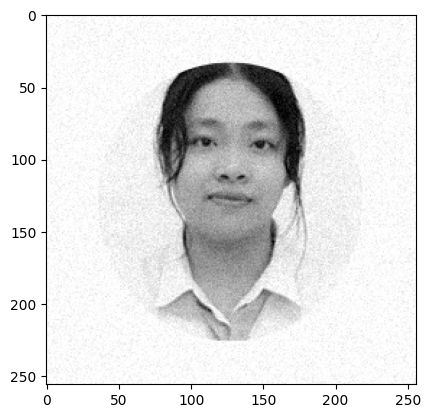

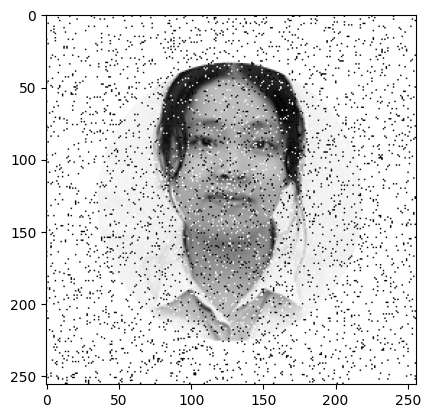

In [ ]:
#them nhieu
img = cv2.imread(path)
img = cv2.resize(img, (256, 256))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def nhieu_gau(img):
  #tao do nhieu
  gau_noise=np.random.normal(0,10,img_gray.shape).astype(np.float32)
  #add do nhieu vao anh
  gau_noise_img= img_gray.astype(np.float32)+gau_noise
  gau_noise_img= np.clip(gau_noise_img,0,255).astype(np.uint8)
  return gau_noise_img

gau_img=nhieu_gau(img_gray)
plt.imshow(gau_img,cmap='gray')
plt.show()

prob=0.1 #ti le nhieu
def nhieu_salt(img):
  sp_noise_img=img.copy()
  rnd=np.random.rand(*img.shape)
  #muoi
  sp_noise_img[rnd<(prob/2)]=0
  sp_noise_img[rnd>1-(prob/2)]=255
  return sp_noise_img

s_img=nhieu_salt(img_gray)
plt.imshow(s_img,cmap='gray')
plt.show()



In [3]:
# histogram , ss 2 anh (anh xam , anh co nhieu )
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def cal_hist(img):
  hist=np.bincount(img.ravel(),minlength=256).astype(np.float32)
  pmf =hist/hist.sum()
  cdf=np.cumsum(pmf)
  return hist,pmf,cdf

def hist_equal(img):
  hist,pmf,cdf= cal_hist(img)
  cdf=np.round(cdf*255).astype(np.uint8)
  img_equal=cdf[img]
  return img_equal

#def cal_cladhe(img,clip=2.0,grid=(8,8)):


img_equal = hist_equal(img_gray)

# Tính lại histogram sau cân bằng
# may dau gach o day : bo qua pmf , cdf
hist_gray, _, _ = cal_hist(img_gray)
hist_eq, _, _ = cal_hist(img_equal)

plt.figure(figsize=(12, 8))

# Ảnh gốc
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Ảnh xám gốc')
plt.axis('off')

# Histogram ảnh gốc
plt.subplot(2,2,2)
plt.plot(hist_gray, color='black')
plt.title('Histogram ảnh gốc')


# Ảnh sau khi cân bằng
plt.subplot(2,2,3)
plt.imshow(img_equal, cmap='gray')
plt.title('Ảnh sau cân bằng histogram')
plt.axis('off')

# Histogram sau khi cân bằng
plt.subplot(2,2,4)
plt.plot(hist_eq, color='black')
plt.title('Histogram ảnh sau cân bằng')


plt.tight_layout()
plt.show()


NameError: name 'cv2' is not defined

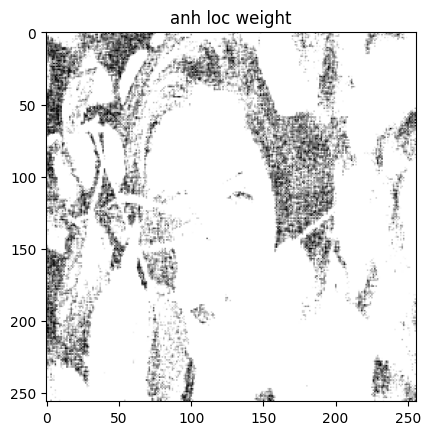

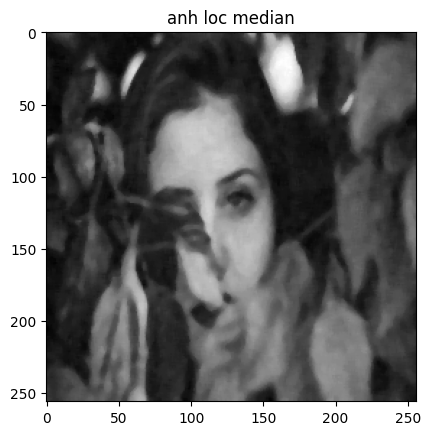

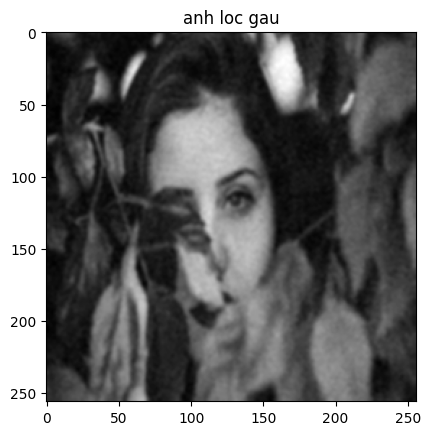

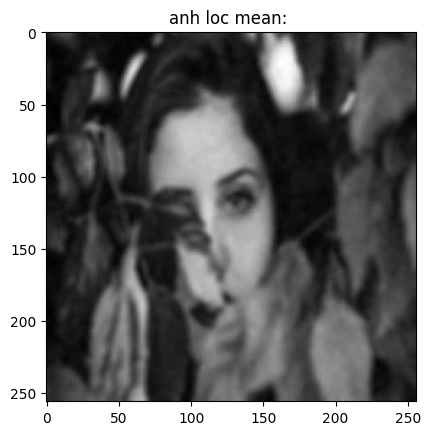

In [ ]:
#loc nhieu , co tất cả 3 bộ lọc nhiễu(mean,gausian,trọng số(kernel bất ky))

def mean(img):
  img_mean=cv2.blur(img,(5,5))
  return img_mean

def gau(img):
  img_gau=cv2.GaussianBlur(img,(5,5),0)
  return img_gau

def median(img):
  img_median=cv2.medianBlur(img,5)
  return img_median

#bộ lọc bất kỳ
kernel = np.array([[-1, 2, -1],
                   [2, 4, 2],
                   [-1, 2, -1]])
def weight(img):
  img_weight=cv2.filter2D(img,-1,kernel)
  return img_weight

img_weight=weight(gau_img)
plt.imshow(img_weight,cmap='gray')
plt.title("anh loc weight")
plt.show()

img_median=median(gau_img)
plt.imshow(img_median,cmap='gray')
plt.title("anh loc median")
plt.show()

img_gau=gau(gau_img)
plt.imshow(img_gau,cmap='gray')
#bo loc gau tốt hơn mean
plt.title("anh loc gau")
plt.show()


img_mean=mean(gau_img)
plt.imshow(img_mean,cmap='gray')
plt.title("anh loc mean: ")
plt.show()





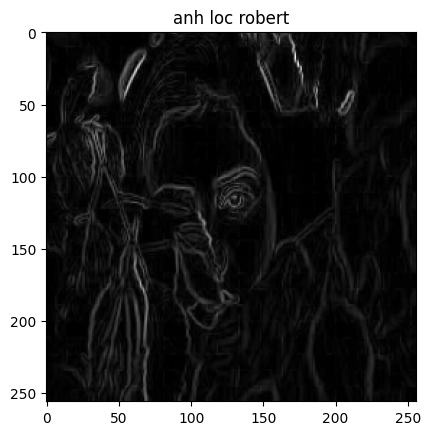

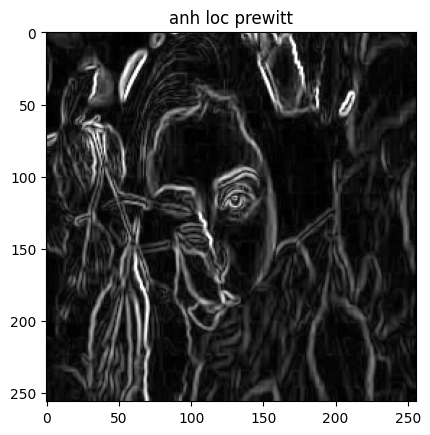

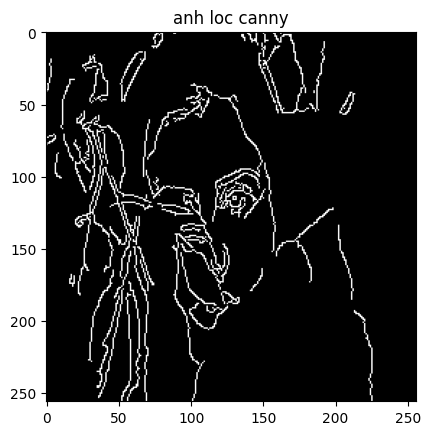

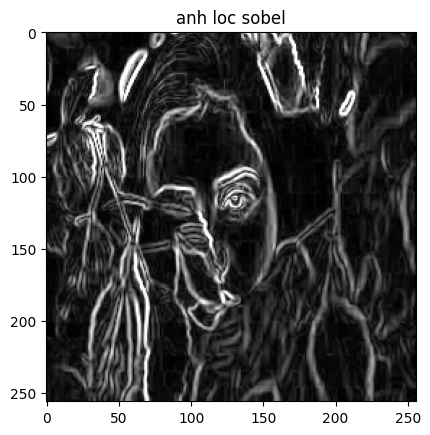

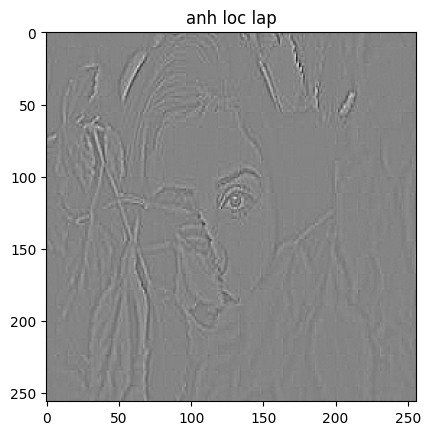

In [ ]:
k_laplacian= np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])

def laplacian(img):
  img_lap=cv2.filter2D(img,cv2.CV_32F,k_laplacian)
  return img_lap
def sobel(img):
  img_sobelx=cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
  img_sobely=cv2.Sobel(img,cv2.CV_32F,0,1,ksize=3)
  img_sobel=cv2.magnitude(img_sobelx,img_sobely)
  img_sobel=cv2.convertScaleAbs(img_sobel)
  return img_sobel

def canny(img):
  img_canny=cv2.Canny(img,70,190)
  return img_canny

def prewitt(img):
  kernel_x = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])
  kernel_y = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])
  img_prewittx = cv2.filter2D(img, cv2.CV_32F, kernel_x)
  img_prewitty = cv2.filter2D(img, cv2.CV_32F, kernel_y)
  img_prewitt = cv2.magnitude(img_prewittx, img_prewitty)
  img_prewitt = cv2.convertScaleAbs(img_prewitt)
  return img_prewitt

def robert(img):
  kernel_x = np.array([[0, 0, 0],
                       [0, 1, 0],
                       [0, 0, -1]])
  kernel_y = np.array([[0, 0, 0],
                       [0, 0, 1],
                       [0, -1, 0]])
  img_robertx = cv2.filter2D(img, cv2.CV_32F, kernel_x)
  img_roberty = cv2.filter2D(img, cv2.CV_32F, kernel_y)
  img_robert = cv2.magnitude(img_robertx, img_roberty)
  img_robert = cv2.convertScaleAbs(img_robert)
  return img_robert



img_robert=robert(img_gray)
plt.imshow(img_robert,cmap='gray')
plt.title("anh loc robert")
plt.show()

img_prewitt=prewitt(img_gray)
plt.imshow(img_prewitt,cmap='gray')
plt.title("anh loc prewitt")
plt.show()

img_canny=canny(img_gray)
plt.imshow(img_canny,cmap='gray')
plt.title("anh loc canny")
plt.show()

img_sobel=sobel(img_gray)
plt.imshow(img_sobel,cmap='gray')
plt.title("anh loc sobel")
plt.show()


img_lap=laplacian(img_gray)
plt.imshow(img_lap,cmap='gray')
plt.title("anh loc lap")
plt.show()

In [1]:
#sharpening anh (sac net anh)
def sharpen_image(img_gray):
    # --- Unsharp Masking ---
    blurred = cv2.GaussianBlur(img_gray, (7,7), 1.0)
    mask = cv2.subtract(img_gray, blurred)
    unsharp = cv2.add(img_gray, mask)

    # --- Sharpening bằng Kernel ---
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_kernel = cv2.filter2D(img_gray, -1, kernel)

    return unsharp, sharpened_kernel

unsharp, sharpened_kernel = sharpen_image(img_gray)

plt.figure(figsize=(12, 8))

# Ảnh gốc
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Ảnh xám gốc')
plt.axis('off')

# Ảnh sau khi unsharp masking
plt.subplot(2,2,2)
plt.imshow(unsharp, cmap='gray')
plt.title('Ảnh sau unsharp masking')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sharpened_kernel, cmap='gray')
plt.title('Ảnh sau sharpening bằng kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'img_gray' is not defined

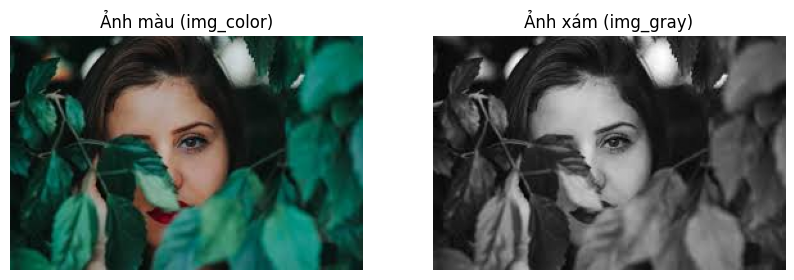

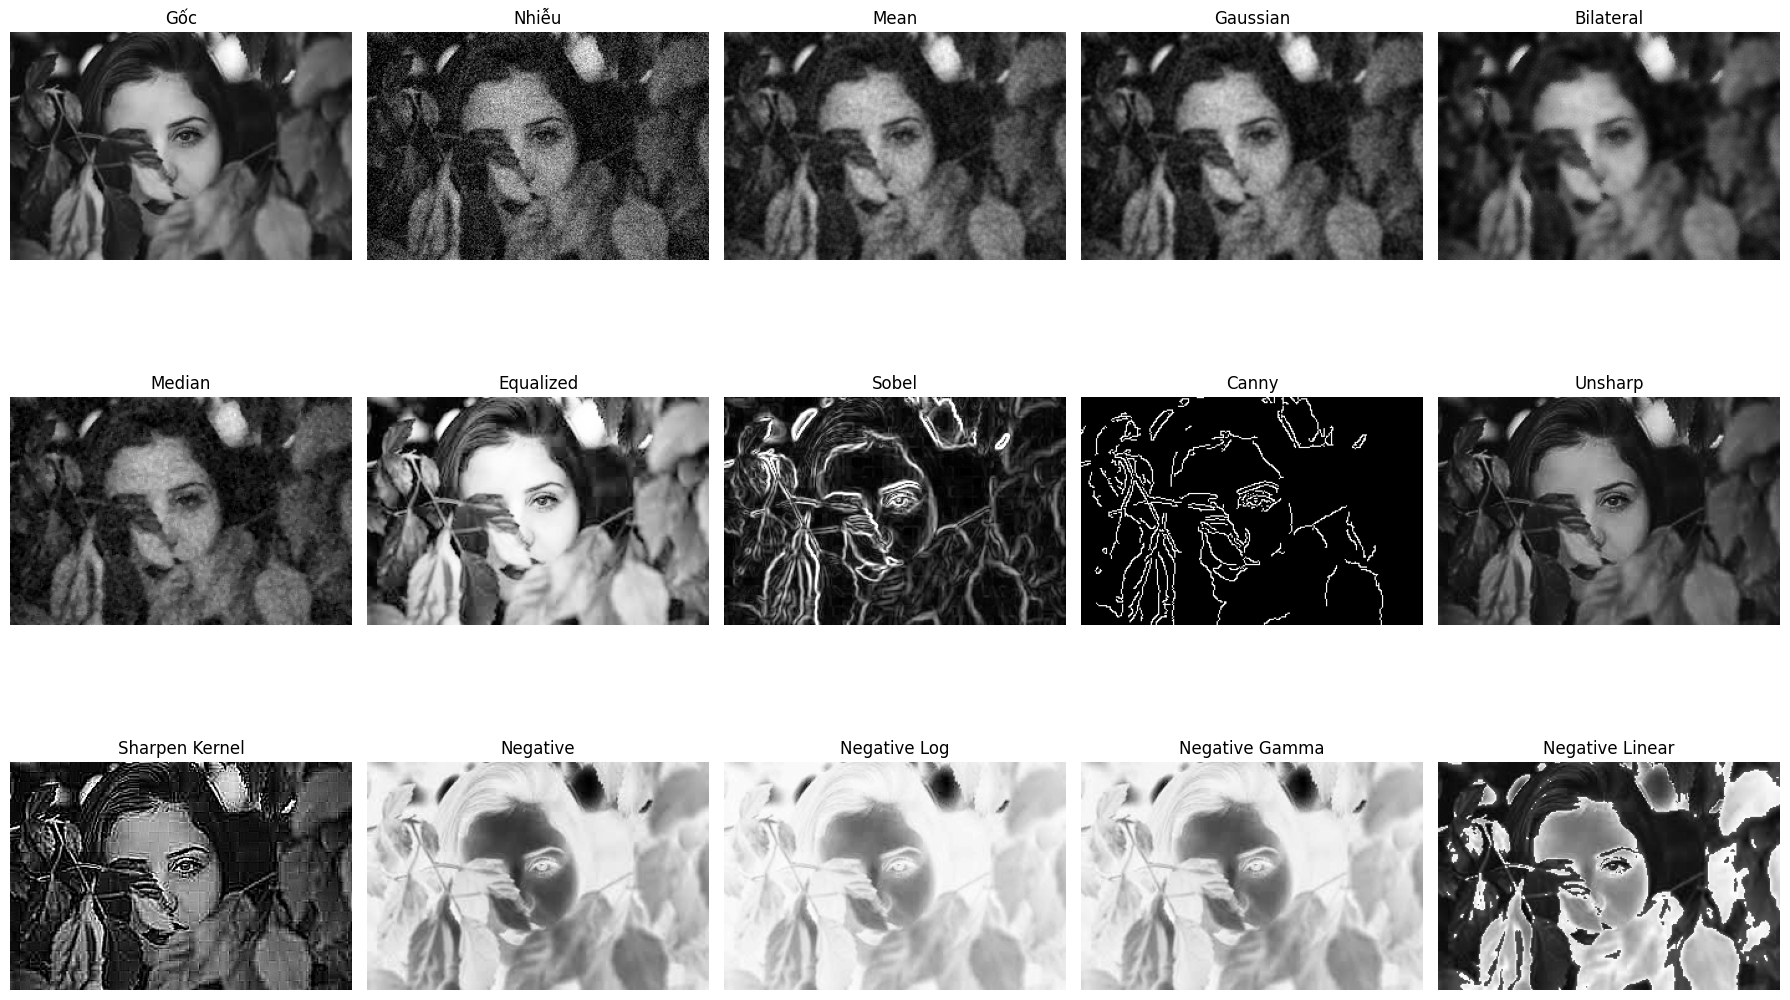

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Câu 1: Đọc và hiển thị ảnh
# =========================
def read_and_show_image(path):
    img_color = cv2.imread(path)                     # Đọc ảnh màu
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Chuyển sang ảnh xám

    # Hiển thị
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh màu (img_color)")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Ảnh xám (img_gray)")
    plt.axis('off')
    plt.show()

    return img_color, img_gray

# =========================
# Câu 2: Thêm nhiễu Gaussian
# =========================
def add_noise(img_gray, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, img_gray.shape).astype(np.float32)
    noisy = img_gray.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# =========================
# Câu 3: Lọc nhiễu
# =========================
def denoise(img_noisy):
    mean = cv2.blur(img_noisy, (3,3))                            # Mean filter
    gaussian = cv2.GaussianBlur(img_noisy, (5,5), 1)             # Gaussian filter
    bilateral = cv2.bilateralFilter(img_noisy, 9, 75, 75)        # Bilateral filter
    median = cv2.medianBlur(img_noisy, 3)                        # Median filter
    return mean, gaussian, bilateral, median

# =========================
# Câu 4: Histogram Equalization
# =========================
def histogram_equalization(img_gray):
    equalized = cv2.equalizeHist(img_gray)
    return equalized

# =========================
# Câu 5: Edge Detection
# =========================
def edge_detection(img_gray):
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    sobel = cv2.convertScaleAbs(sobel)

    canny = cv2.Canny(img_gray, 100, 200)
    return sobel, canny

# =========================
# Câu 6: Sharpening Image
# =========================
def sharpen_image(img_gray):
    # --- Unsharp Masking ---
    blurred = cv2.GaussianBlur(img_gray, (5,5), 1.0)
    mask = cv2.subtract(img_gray, blurred)
    unsharp = cv2.add(img_gray, mask)

    # --- Sharpening bằng Kernel ---
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_kernel = cv2.filter2D(img_gray, -1, kernel)

    return unsharp, sharpened_kernel

# =========================
# Bổ sung: Ảnh bản âm (Negative)
# =========================
def negative_images(img_gray):
    negative_basic = 255 - img_gray                    # 1. Cơ bản
    negative_log = np.uint8(255 * (np.log1p(255 - img_gray) / np.log(256)))  # 2. Log
    negative_gamma = np.uint8(255 * ((255 - img_gray)/255)**0.5)             # 3. Gamma <1
    threshold = img_gray.mean()
    negative_thresh = np.where(img_gray > threshold, 255 - img_gray, img_gray)
    return negative_basic, negative_log, negative_gamma, negative_thresh

# =========================
# Thực thi toàn bộ pipeline
# =========================
path = "/content/drive/MyDrive/Colab Notebooks/phunu.jpg"  # thay bằng ảnh của bạn

img_color, img_gray = read_and_show_image(path)

# Thêm nhiễu
img_noisy = add_noise(img_gray)

# Lọc nhiễu
mean, gaussian, bilateral, median = denoise(img_noisy)

# Cân bằng histogram
equalized = histogram_equalization(img_gray)

# Phát hiện biên
sobel, canny = edge_detection(img_gray)

# Sharpen
unsharp, sharpened_kernel = sharpen_image(img_gray)

# Ảnh bản âm
neg_basic, neg_log, neg_gamma, neg_linear = negative_images(img_gray)

# =========================
# Hiển thị kết quả
# =========================
titles = ['Gốc', 'Nhiễu', 'Mean', 'Gaussian', 'Bilateral', 'Median',
          'Equalized', 'Sobel', 'Canny', 'Unsharp', 'Sharpen Kernel',
          'Negative', 'Negative Log', 'Negative Gamma', 'Negative Linear']

images = [img_gray, img_noisy, mean, gaussian, bilateral, median,
          equalized, sobel, canny, unsharp, sharpened_kernel,
          neg_basic, neg_log, neg_gamma, neg_linear]

plt.figure(figsize=(18,12))
for i in range(len(images)):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


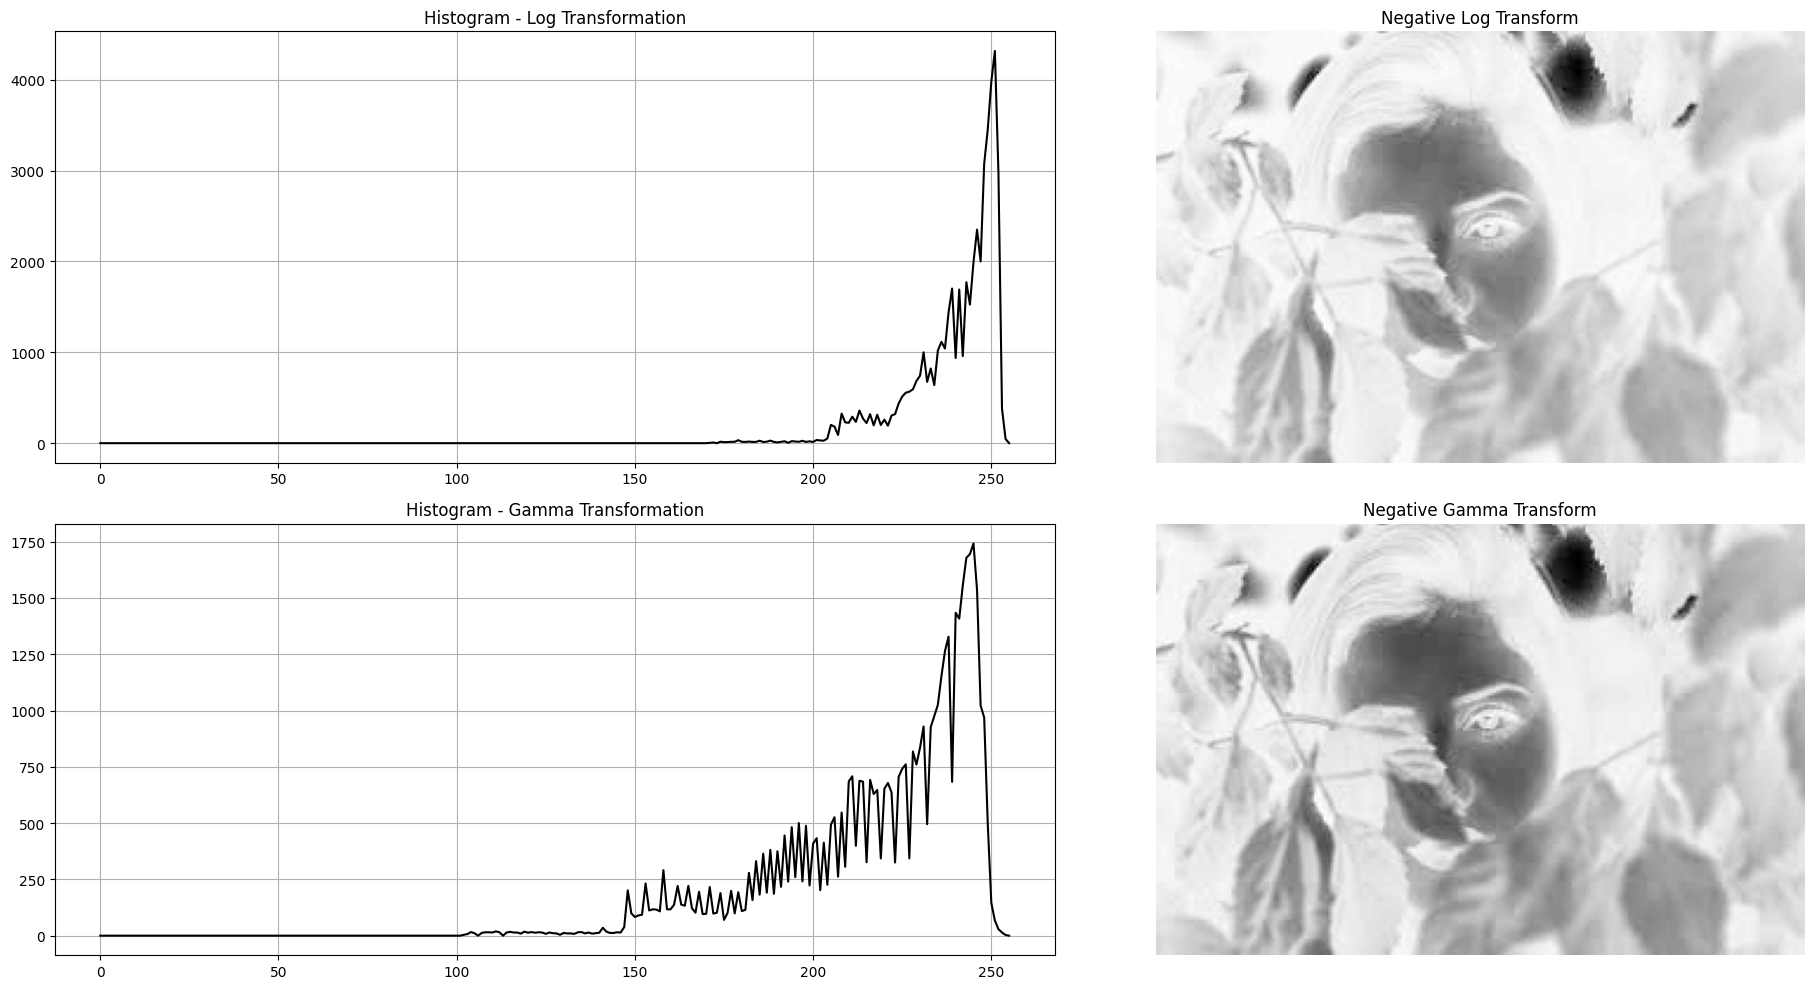

In [ ]:
hist_log, _, _ = cal_hist(neg_log)
hist_gamma, _, _ = cal_hist(neg_gamma)


plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(hist_log, color='black')
plt.title('Histogram - Log Transformation')
plt.grid(True)

# Ảnh âm log
plt.subplot(2, 2, 2)
plt.imshow(neg_log, cmap='gray')
plt.title('Negative Log Transform')
plt.axis('off')

# Histogram của gamma
plt.subplot(2, 2, 3)
plt.plot(hist_gamma, color='black')
plt.title('Histogram - Gamma Transformation')
plt.grid(True)

# Ảnh âm gamma
plt.subplot(2, 2, 4)
plt.imshow(neg_gamma, cmap='gray')
plt.title('Negative Gamma Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
#ai geminni làm
# Assuming img_gray is the original image without noise
# Assuming img_noisy, mean, gaussian, bilateral, median are the noisy and denoised images

images_to_compare = {
    'Noisy': img_noisy,
    'Mean Filter': mean,
    'Gaussian Filter': gaussian,
    'Bilateral Filter': bilateral,
    'Median Filter': median
}

results = {}

for name, img in images_to_compare.items():
    # Calculate PSNR
    psnr = peak_signal_noise_ratio(img_gray, img)

    # Calculate SSIM (convert to float for ssim)
    # ssim requires images to be of the same data type and range
    img_gray_float = img_gray.astype(np.float64)
    img_float = img.astype(np.float64)
    ssim = structural_similarity(img_gray_float, img_float, data_range=img_float.max() - img_float.min())

    results[name] = {'PSNR': psnr, 'SSIM': ssim}

# Display the results
print("Comparison of Denoising Filters (vs Original Image):")
for name, metrics in results.items():
    print(f"{name}: PSNR = {metrics['PSNR']:.2f}, SSIM = {metrics['SSIM']:.4f}")

Comparison of Denoising Filters (vs Original Image):
Noisy: PSNR = 20.67, SSIM = 0.3499
Mean Filter: PSNR = 28.68, SSIM = 0.7109
Gaussian Filter: PSNR = 29.38, SSIM = 0.7474
Bilateral Filter: PSNR = 28.90, SSIM = 0.7669
Median Filter: PSNR = 27.10, SSIM = 0.6443


Interpretation of Results:

- **PSNR (Peak Signal-to-Noise Ratio):** Higher PSNR indicates a better reconstruction of the image, meaning less noise.
- **SSIM (Structural Similarity Index):** Higher SSIM indicates that the image is perceived as more similar to the original by humans, considering structural information.

Generally, a better denoising method will result in higher PSNR and SSIM values.

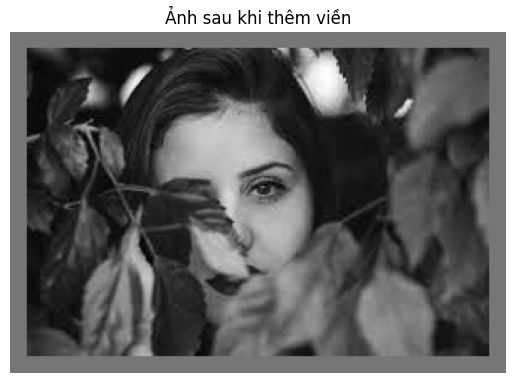

In [ ]:
#them vien cho anh
padded_img = cv2.copyMakeBorder(
    img_gray,          # Ảnh đầu vào
    10, 10, 10, 10,    # top, bottom, left, right
    cv2.BORDER_CONSTANT, # kiểu viền cố định
    value=100       # giá trị pixel viền (0 = đen)(muc xam tu 50-200)
)

plt.imshow(padded_img, cmap='gray')
plt.title('Ảnh sau khi thêm viền')
plt.axis('off')
plt.show()